# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [2]:
pwd

'/home/monesh04246052/Projects/Project 1 - Black Friday Sales prediction /ML algorithms'

In [3]:
sales = pd.read_csv('/home/monesh04246052/Projects/Project 1 - Black Friday Sales prediction /Datasets/train_file/train.csv')
sales.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Summary

In [5]:
sales['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

# Preprocessing the data

In [6]:
sales_1 = sales.copy()

In [7]:
sales_1['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

 --> Creating Custom Column Transformers

In [8]:
from sklearn.base import BaseEstimator , TransformerMixin

class ColumnTransfomer(BaseEstimator,TransformerMixin):
    
    def __init__(self , X = True):
        self.X = X
        
    def fit(self , X):
        return self   # Do nothing
    
    def transform(self,X):
        
        x = {'0-17':0 , '18-25':1 , '26-35':2 , '36-45':3 , '46-50':4 , '51-55':5 , '55+':6}
        X['Age'] = X['Age'].map(x)   # Encoding feature 'Age'.
        X['Gender'] = X['Gender'].map({'M':0 , 'F':1})   # Label Encoding feature 'Gender'.
        X.drop('Occupation',inplace=True,axis=1) # Dropping feature 'Occupation'.
        X.drop('City_Category',inplace = True , axis=1) # Dropping feature 'City_Category'.
        X.drop('Stay_In_Current_City_Years',inplace=True,axis=1)   
        X.drop('User_ID',inplace=True,axis=1)
        X.drop('Product_ID',inplace=True,axis=1)

In [9]:
col_trans = ColumnTransfomer()

In [10]:
col_trans.fit_transform(sales_1)

In [11]:
sales_1.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,0,3,NaN,NaN,8370
1,1,0,0,1,6.0,14.0,15200
2,1,0,0,12,NaN,NaN,1422
3,1,0,0,12,14.0,NaN,1057
4,0,6,0,8,NaN,NaN,7969


--> Creating pipelines to preprocess the data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [13]:
pipeline = Pipeline([
    ('impute' , SimpleImputer(strategy='most_frequent'))
])

In [14]:
final_data = pipeline.fit_transform(sales_1)
final_data = pd.DataFrame(data=final_data,columns=sales_1.columns)
final_data.head()

,Gender,Age,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1.0,0.0,0.0,3.0,8.0,16.0,8370.0
1,1.0,0.0,0.0,1.0,6.0,14.0,15200.0
2,1.0,0.0,0.0,12.0,8.0,16.0,1422.0
3,1.0,0.0,0.0,12.0,14.0,16.0,1057.0
4,0.0,6.0,0.0,8.0,8.0,16.0,7969.0


--> Seperating X and y

In [15]:
feat = final_data.drop('Purchase',axis=1)
label = final_data[['Purchase']]

--> scaling the data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
pline = Pipeline([
    ('scale' , MinMaxScaler())
]) 

In [18]:
scaled_feat = pline.fit_transform(feat)
scaled_label = pline.fit_transform(label)
scaled_label = scaled_label.ravel()

In [19]:
feat.shape

(550068, 6)

In [20]:
len(scaled_feat)

550068

In [21]:
len(scaled_label)

550068

# Splitting the data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feat, scaled_label, test_size=0.2)

# MLP Model

In [24]:
import keras

Using TensorFlow backend.


In [25]:
scaled_feat.shape

(550068, 6)

--> Building network

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(30,input_dim = 6 , activation='selu',kernel_initializer='lecun_normal'))
model.add(Dense(60,input_dim = 6 , activation='selu',kernel_initializer='lecun_normal'))
model.add(Dense(120,input_dim = 6 , activation='selu',kernel_initializer='lecun_normal'))

model.add(Dense(1))



W0804 02:21:47.890383 140299458000704 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 02:21:47.909915 140299458000704 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 02:21:47.913339 140299458000704 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4095: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0804 02:21:47.930105 140299458000704 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3140: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated an

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_3 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 121       
Total params: 9,511
Trainable params: 9,511
Non-trainable params: 0
_________________________________________________________________


--> compliling model

In [28]:
model.compile(optimizer='adam',loss='mean_squared_error')

W0804 02:21:48.048349 140299458000704 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



--> Training model

In [29]:
# Adding call backs
early_stopping = keras.callbacks.EarlyStopping(patience=10) # if there is no improvement in accuracy for 10 epochs, training will stop

history = model.fit(X_train,y_train,epochs=50, validation_split=0.2 ,callbacks=[early_stopping] , batch_size=3520)

W0804 02:21:48.275334 140299458000704 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:984: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 352043 samples, validate on 88011 samples
Epoch 1/50
352043/352043 [==============================] - 2s 5us/step - loss: 0.1533 - val_loss: 0.0430
Epoch 2/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0387 - val_loss: 0.0374
Epoch 3/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0358 - val_loss: 0.0360
Epoch 4/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0346 - val_loss: 0.0351
Epoch 5/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0338 - val_loss: 0.0342
Epoch 6/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0333 - val_loss: 0.0341
Epoch 7/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0329 - val_loss: 0.0341
Epoch 8/50
352043/352043 [==============================] - 1s 3us/step - loss: 0.0326 - val_loss: 0.0334
Epoch 9/50
352043/352043 [==============================] - 1s 4us/step - loss: 0.0323 - val_loss: 0.

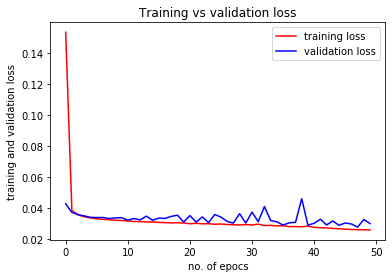

In [30]:
plt.plot(history.history['loss'] , 'r-',label = 'training loss')
plt.plot(history.history['val_loss'] , 'b-' , label = 'validation loss')
plt.title('Training vs validation loss')
plt.xlabel('no. of epocs')
plt.ylabel('training and validation loss')
plt.legend()

# Evaluating the model on test data

In [31]:
mse_test = model.evaluate(X_test,y_test)

110014/110014 [==============================] - 2s 20us/step


# Predictions

In [32]:
pred = model.predict(X_test[:10])
pred

array([[0.55171096],
       [0.51611966],
       [0.11771263],
       [0.30050263],
       [0.37434256],
       [0.48737398],
       [0.3500386 ],
       [0.61684746],
       [0.37735233],
       [0.23939215]], dtype=float32)

In [33]:
y_test[:10]

array([0.63697858, 0.81848929, 0.00450958, 0.29934444, 0.14702075,
       0.66624911, 0.36561026, 0.79990814, 0.22109483, 0.36757276])